### Practical Questions

K-Means Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

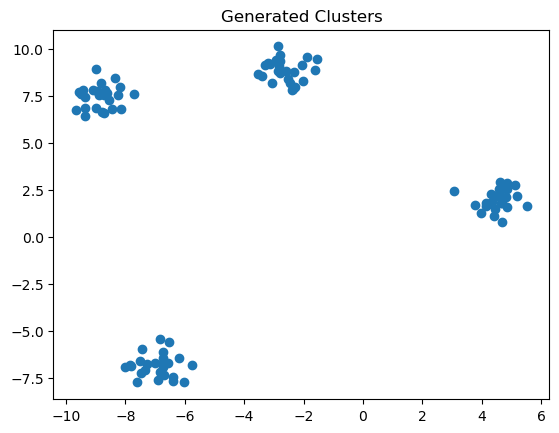

In [2]:
X, y = make_blobs(n_samples=100, centers=4, cluster_std=0.6, random_state=42)
plt.scatter(X[:, 0], X[:, 1])
plt.title("Generated Clusters")
plt.show()

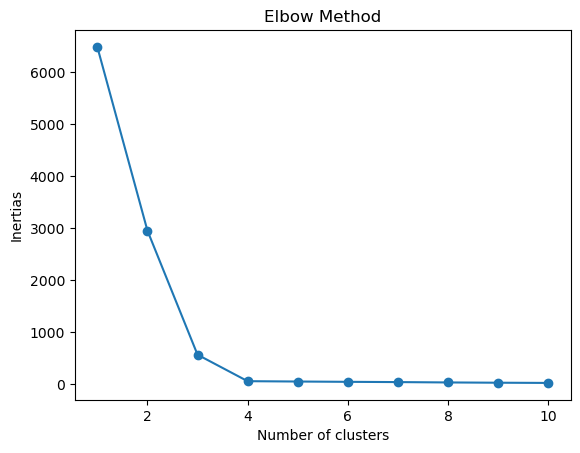

In [5]:
inertias = []
K = range(1, 11)

for k in K: 
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=10)
    km.fit(X)
    inertias.append(km.inertia_)

plt.plot(K, inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertias')
plt.title('Elbow Method')
plt.show()

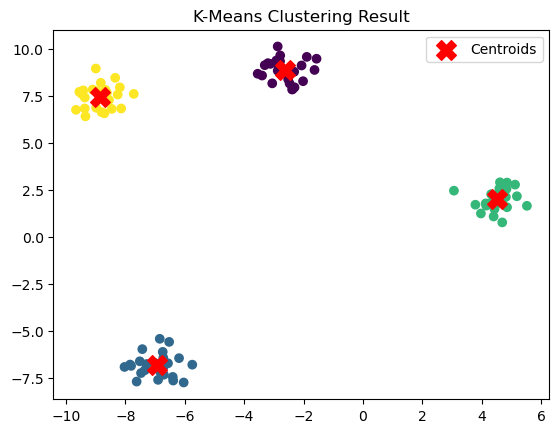

In [8]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label="Centroids"),
plt.legend()
plt.title("K-Means Clustering Result")
plt.show()

In [10]:
score = silhouette_score(X, y_kmeans)
score

0.8776917599986342

parameters are:

n_clusters, 

init:['k-means++'], 

n_init:[10]

### 2. Hierarchichal Clustering

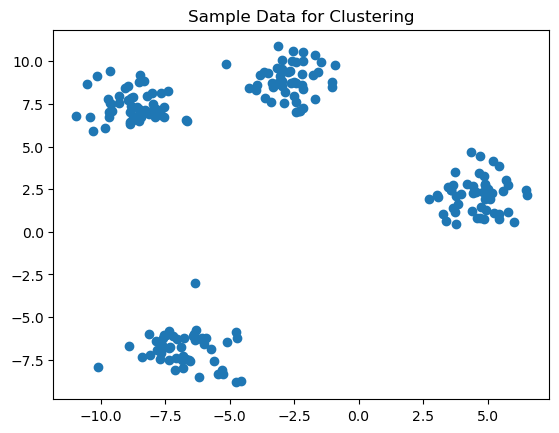

In [11]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

X, y = make_blobs(n_samples=200, centers=4, cluster_std=1.0, random_state=42)
plt.scatter(X[:, 0], X[:, 1])
plt.title("Sample Data for Clustering")
plt.show()

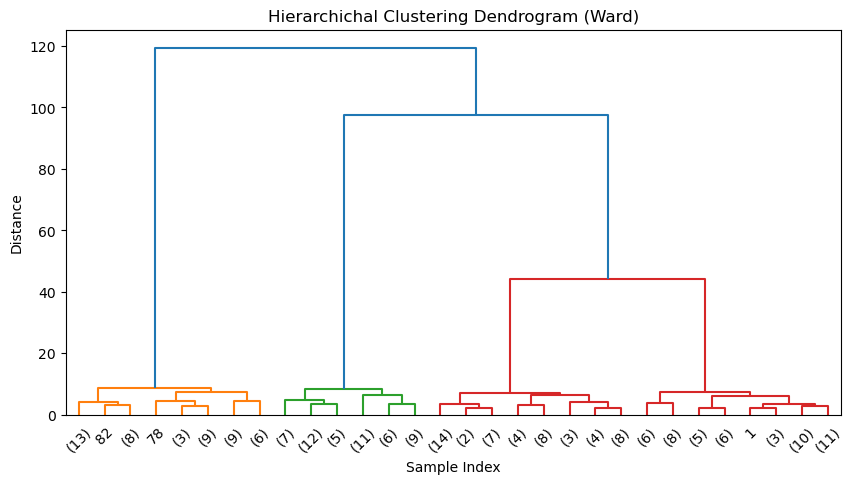

In [12]:
linked = linkage(X, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='lastp', p=30)
plt.title('Hierarchichal Clustering Dendrogram (Ward)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [13]:
linkage_methods = ['ward', 'complete', 'average', 'single']

model = AgglomerativeClustering(n_clusters=4, linkage=linkage_methods[0], metric='euclidean')
labels = model.fit_predict(X)
score = silhouette_score(X, labels)
score


0.7947822916132822

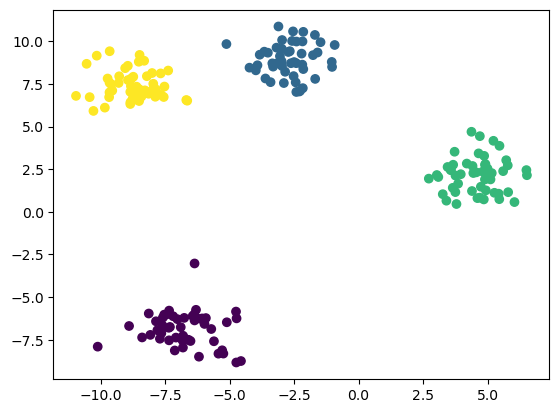

In [14]:
plt.scatter(X[:,0], X[:, 1], c=labels, cmap='viridis')

### 3. DBScan 

/var/folders/m9/j9s4np6n4093jb6mgddz4btw0000gn/T/ipykernel_57738/1720223668.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10' , len(unique_labels))


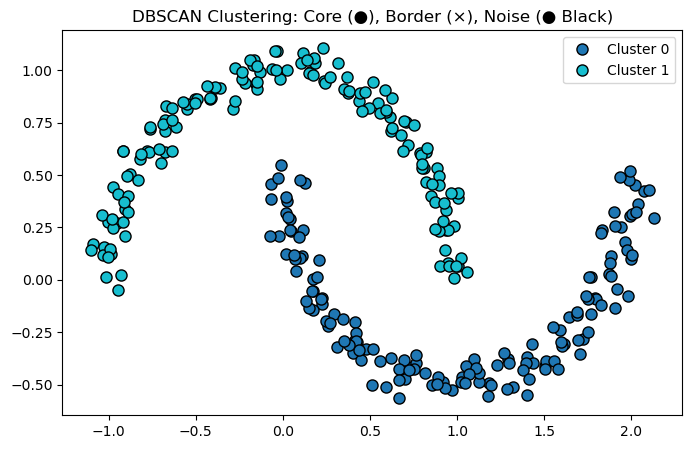

In [16]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

X, y = make_moons(n_samples=300, noise=0.05, random_state=42)

db = DBSCAN(eps=0.2, min_samples=5)
labels = db.fit_predict(X)

core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

unique_labels = set(labels)

colors = plt.cm.get_cmap('tab10' , len(unique_labels))


plt.figure(figsize=(8, 5))
for k in unique_labels:
    class_member_mask = (labels == k)
    
    # Core points
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=colors(k) if k != -1 else 'k',
             markeredgecolor='k', markersize=8, label=f'Cluster {k}' if k != -1 else 'Noise')
    
    # Border points
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'x', markerfacecolor=colors(k) if k != -1 else 'k',
             markeredgecolor='k', markersize=6)

plt.title("DBSCAN Clustering: Core (●), Border (×), Noise (● Black)")
plt.legend()
plt.show()

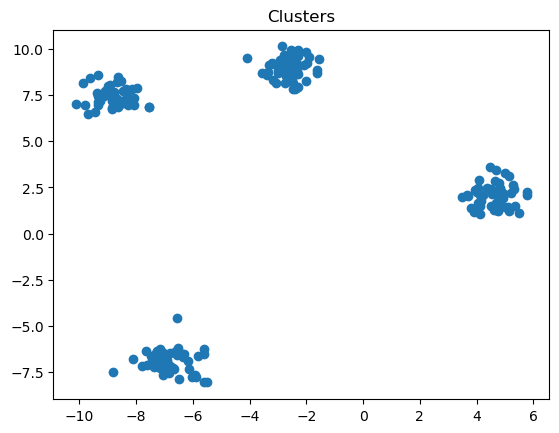

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X, y = make_blobs(n_samples=200, centers=4, cluster_std=0.6, random_state=42)
plt.scatter(X[:, 0], X[:, 1])
plt.title("Clusters")
plt.show()

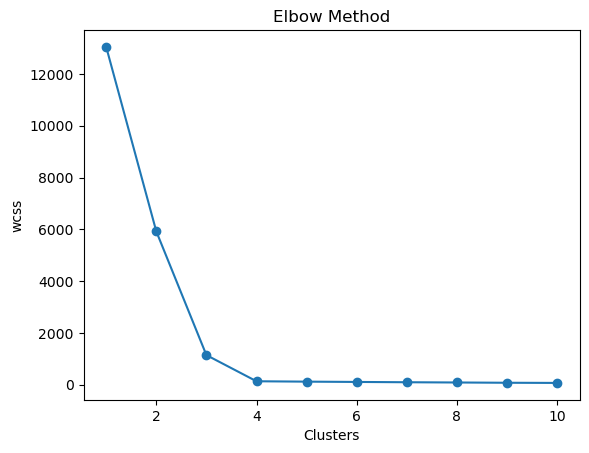

In [21]:
# elbow method 
inertias = []
K = range(1, 11)

for k in K:
    km= KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

plt.plot(K, inertias, marker='o')
plt.xlabel('Clusters')
plt.ylabel('wcss')
plt.title('Elbow Method')
plt.show()

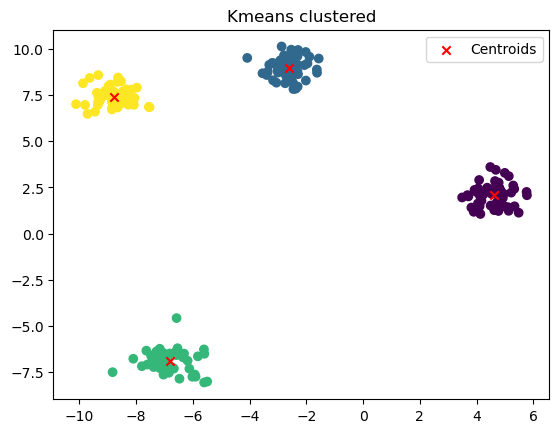

In [23]:
km = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)
y_kmeans = km.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], marker='x', c='red', label='Centroids')
plt.legend()
plt.title('Kmeans clustered')
plt.show()

In [24]:
score = silhouette_score(X, y_kmeans)

In [25]:
score


0.8786114664154485

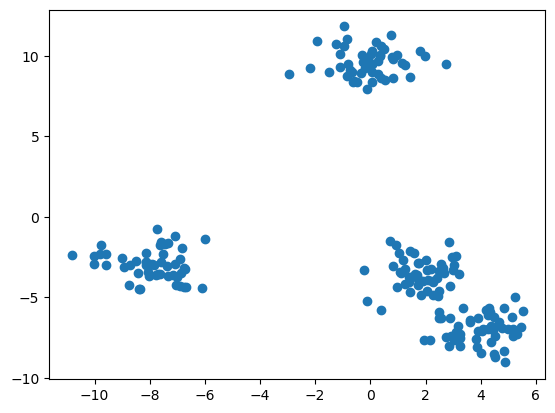

In [26]:
X, _ = make_blobs(n_samples=200, centers=4, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

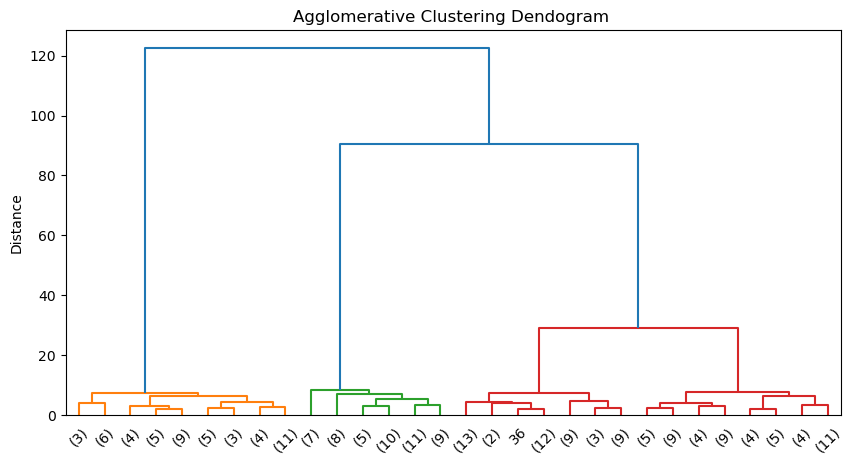

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

linkage = linkage(X, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linkage, truncate_mode='lastp', p=30)
plt.title("Agglomerative Clustering Dendogram ")
plt.ylabel('Distance')
plt.show()

In [28]:
agglo = AgglomerativeClustering(n_clusters=4, linkage='ward')
y_agglo = agglo.fit_predict(X)
score = silhouette_score(X, y_agglo)
score

0.7315913660050205

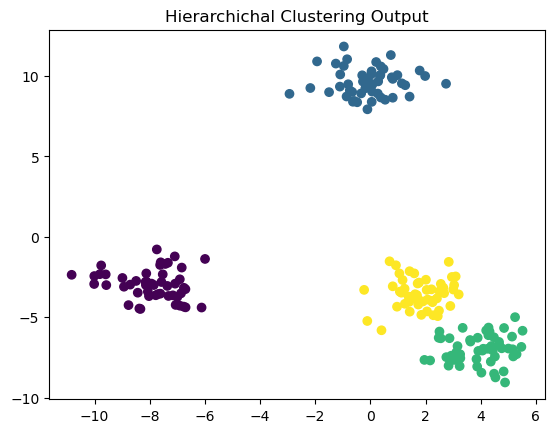

In [29]:
plt.scatter(X[:, 0], X[:, 1], c=y_agglo, cmap='viridis')
plt.title('Hierarchichal Clustering Output')
plt.show()

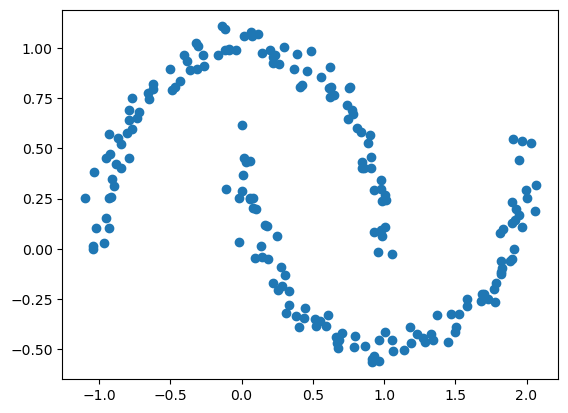

In [30]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

X, y = make_moons(n_samples=200, noise=0.05, random_state=42)

plt.scatter(X[:, 0], X[:, 1])

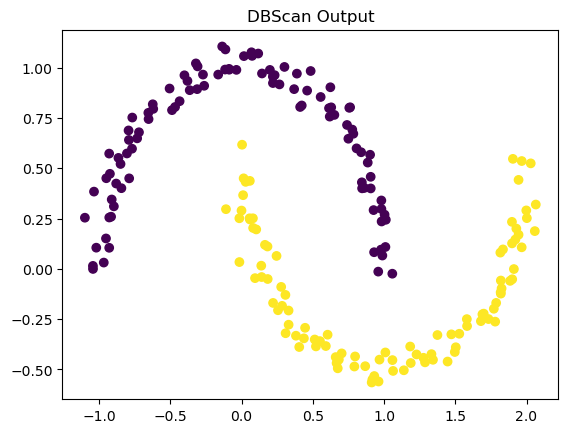

In [31]:
db = DBSCAN(eps=0.2, min_samples=5)
y_db = db.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_db, cmap='viridis')
plt.title('DBScan Output')
plt.show()
